<a href="https://colab.research.google.com/github/GuilhermeOrtega/GuilhermeOrtega/blob/main/Aula_3%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados (EDA) com a PNAD Contínua (IBGE)

**Objetivo:** Realizar uma investigação profunda em uma das principais pesquisas do Brasil, a PNAD Contínua, aplicando os conceitos de análise univariada e bivariada. Este notebook é um roteiro de exploração de dados reais.

---
## 1. Configuração e Obtenção dos Dados do IBGE

Primeiro, vamos carregar as bibliotecas e baixar os microdados diretamente do portal do IBGE. Usaremos os dados do 1º Trimestre de 2024.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import basedosdados as bd
pd.options.display.float_format = '{:.2f}'.format
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)
print("Bibliotecas prontas.")


Bibliotecas prontas.


In [5]:
#https://ftp.ibge.gov.br/Trabalho_e_Rendimento/Pesquisa_Nacional_por_Amostra_de_Domicilios_continua/Trimestral/Microdados/2024/

In [8]:
import pandas as pd

# O nome do arquivo deve ser exatamente o mesmo que você subiu
nome_do_arquivo = 'aula_3+.csv'
# Carregando o CSV para um DataFrame
df = pd.read_csv(nome_do_arquivo)

# Verificando se carregou corretamente, mostrando as 5 primeiras linhas
print("Arquivo CSV carregado com sucesso!")
df.head()

Arquivo CSV carregado com sucesso!


,Ano,Trimestre,UF,UPA,Estrato,Sexo,Idade,Cor_Raca,Anos_Estudo,Rendimento
0,2024,1.00,33.00,33003299.00,3301011.00,Mulher,50.00,Parda,12.00,2500.00
1,2024,1.00,29.00,29002228.00,2901011.00,Homem,55.00,Parda,3.00,1700.00
2,2024,1.00,31.00,31003445.00,3101011.00,Mulher,56.00,Branca,12.00,3000.00
3,2024,1.00,43.00,43003024.00,4301011.00,Mulher,49.00,Branca,16.00,3000.00
4,2024,1.00,35.00,35008581.00,3501012.00,Mulher,36.00,Parda,12.00,2000.00


In [9]:
df.describe()

,Trimestre,UF,UPA,Estrato,Idade,Anos_Estudo,Rendimento
count,293.00,293.00,293.00,293.00,293.00,293.00,293.00
mean,1.00,35.10,35100060.26,3510567.43,40.93,10.96,2980.89
std,0.00,5.75,5746533.51,574614.94,13.06,4.65,2218.86
min,1.00,23.00,23000236.00,2301011.00,16.00,1.00,1200.00
25%,1.00,31.00,31003445.00,3101011.00,30.00,9.00,1500.00
50%,1.00,35.00,35008549.00,3501011.00,42.00,12.00,2000.00
75%,1.00,41.00,41004128.00,4101011.00,52.00,16.00,3500.00
max,1.00,52.00,52002598.00,5201011.00,64.00,16.00,15000.00


---
## 2. Análise Univariada Extensiva
Vamos explorar cada variável de interesse individualmente.

### 2.1 Análise das Variáveis Numéricas

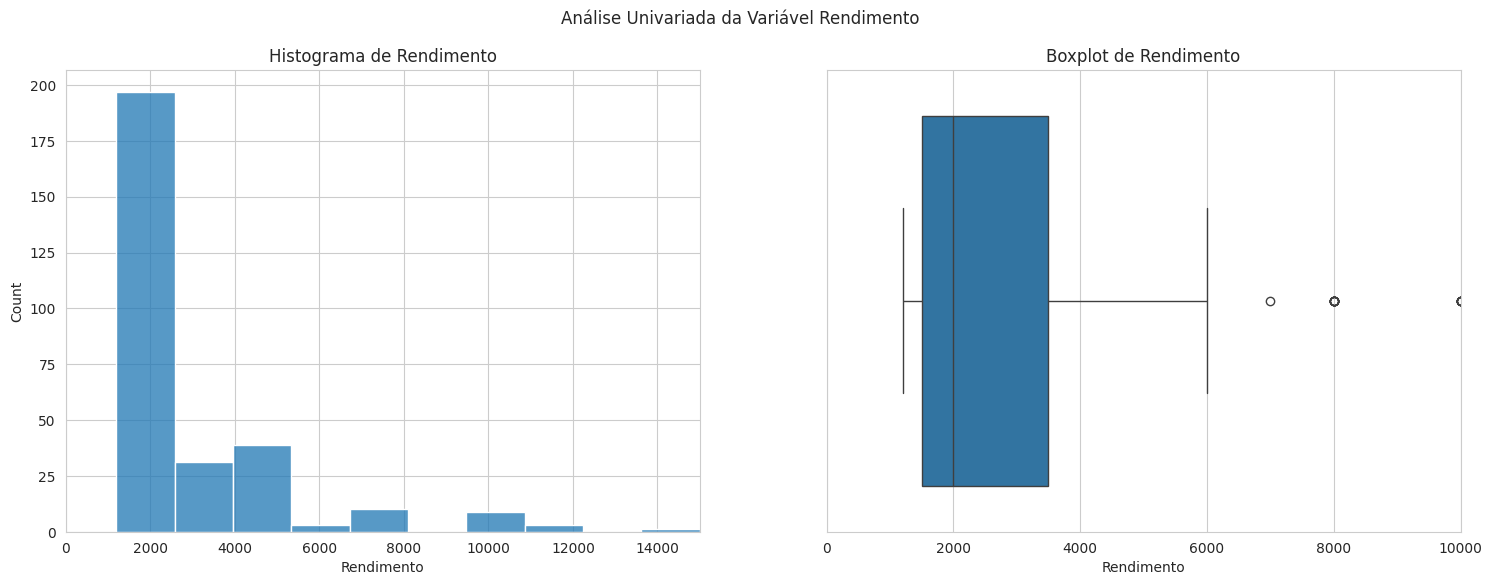

In [15]:
# Célula 2.1.1: Análise completa da variável 'Rendimento'
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Análise Univariada da Variável Rendimento')

# Histograma
sns.histplot(ax=axes[0], data=df, x='Rendimento', bins=10) #Bin estava 100, com 10 melhora a visualização e mais insigths
axes[0].set_title('Histograma de Rendimento')
axes[0].set_xlim(0, 15000) # Limite para melhor visualização

# Boxplot
sns.boxplot(ax=axes[1], data=df, x='Rendimento')
axes[1].set_title('Boxplot de Rendimento')
axes[1].set_xlim(0, 10000) # Limite para melhor visualização
plt.show()

#Grafico 1 - Unimodal,

**Análise `Rendimento`:** A realidade brasileira em um gráfico. A distribuição de renda é extremamente assimétrica à direita. A grande maioria da população se concentra nas faixas de renda mais baixas, enquanto o boxplot mostra uma quantidade massiva de outliers (pessoas com renda muito acima da mediana).

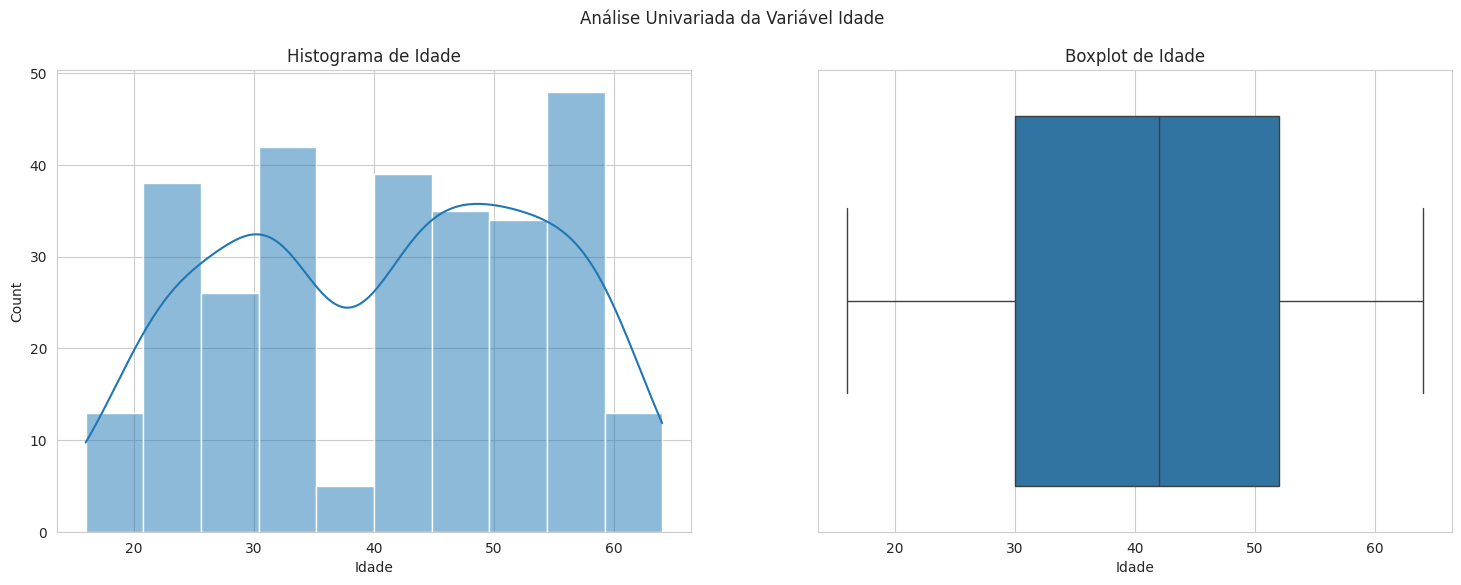

In [18]:
# Célula 2.1.2: Análise completa da variável 'Idade'
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Análise Univariada da Variável Idade')
sns.histplot(ax=axes[0], data=df, x='Idade', kde=True, bins=10)
axes[0].set_title('Histograma de Idade')
sns.boxplot(ax=axes[1], data=df, x='Idade')
axes[1].set_title('Boxplot de Idade')
plt.show()

**Análise `Idade`:** O histograma mostra a distribuição etária da população ocupada no Brasil, com picos entre os 20 e 40 anos. O boxplot resume isso, mostrando que 50% dos trabalhadores têm entre 30 e 51 anos.

### 2.2 Análise das Variáveis Categóricas

Gerando os Gráficos de Barras...


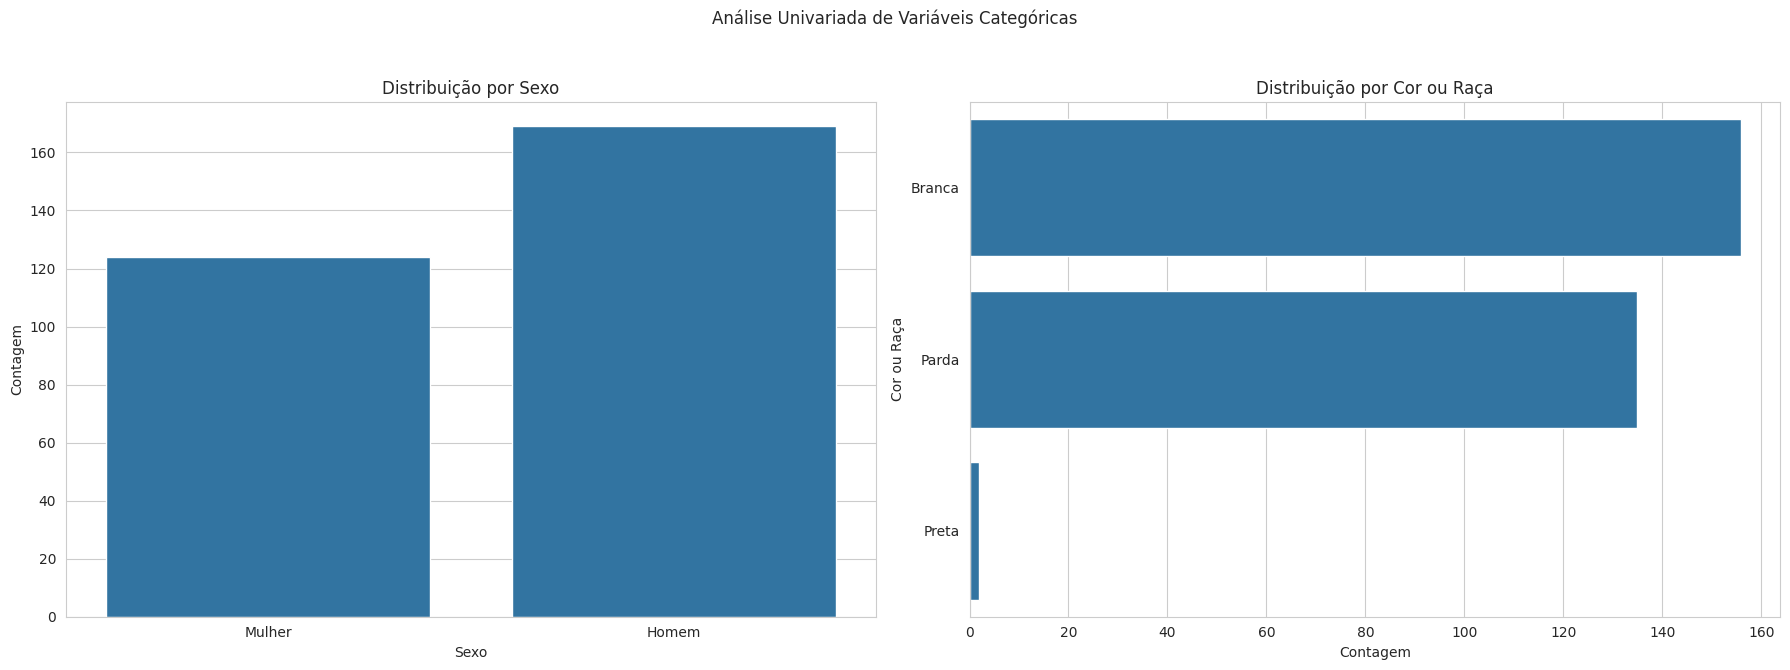

In [22]:
# --- Gráficos de Barras para as variáveis 'Sexo' e 'Cor_Raca' ---
print("Gerando os Gráficos de Barras...")

fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Análise Univariada de Variáveis Categóricas')

# Gráfico para 'Sexo' (vertical)
sns.countplot(ax=axes[0], data=df, x='Sexo')
axes[0].set_title('Distribuição por Sexo')
axes[0].set_xlabel('Sexo')
axes[0].set_ylabel('Contagem')

# Gráfico para 'Cor_Raca' (horizontal para melhor leitura dos rótulos)
sns.countplot(ax=axes[1], data=df, y='Cor_Raca', order=df['Cor_Raca'].value_counts().index)
axes[1].set_title('Distribuição por Cor ou Raça')
axes[1].set_xlabel('Contagem')
axes[1].set_ylabel('Cor ou Raça')

# Ajusta o layout para evitar que os títulos se sobreponham
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Análise Categórica:** Vemos uma distribuição quase igualitária entre homens e mulheres na amostra. Na distribuição por cor ou raça, a categoria "Parda" é a mais frequente, seguida por "Branca".

---
## 3. Análise Bivariada Extensiva
Cruzando as variáveis da PNAD para encontrar relações.

### 3.1 Scatterplot e Heatmap (Numérica vs. Numérica)

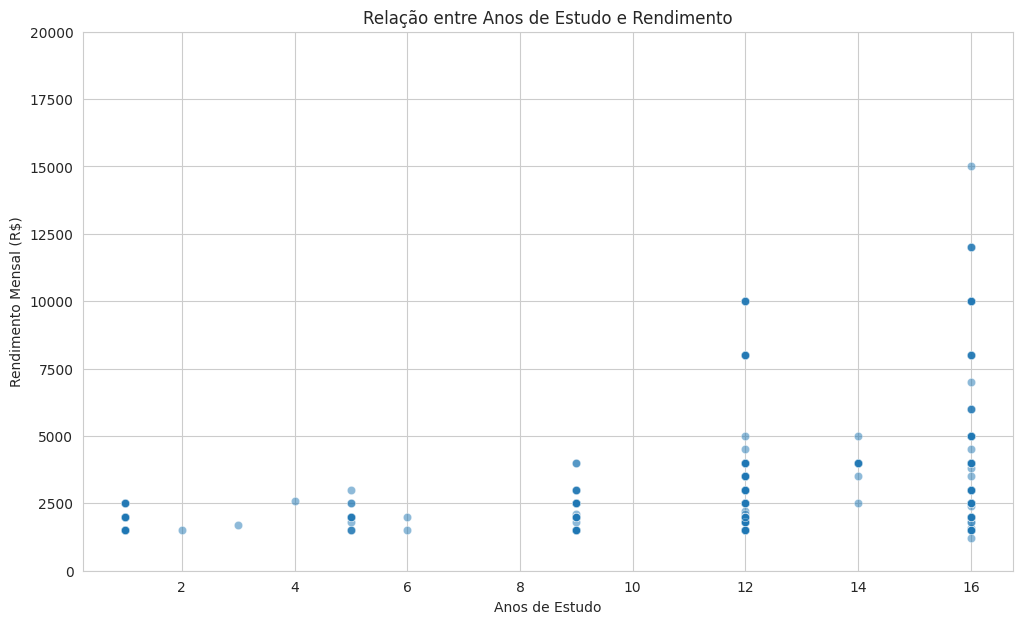

In [26]:
# Célula 3.1.1: 'Anos de Estudo' vs 'Rendimento'
sns.scatterplot(data=df, x='Anos_Estudo', y='Rendimento', alpha=0.5) #Alpha = opacidade das bolinhas
plt.title('Relação entre Anos de Estudo e Rendimento')
plt.xlabel('Anos de Estudo')
plt.ylabel('Rendimento Mensal (R$)')
plt.ylim(0, 20000)
plt.show()

**Análise:** O gráfico de dispersão mostra uma clara **relação positiva**. Conforme os anos de estudo aumentam, a faixa de rendimento também tende a subir. A dispersão é alta, mas a tendência é inegável.

### 3.2 Boxplots Lado a Lado (Numérica vs. Categórica)

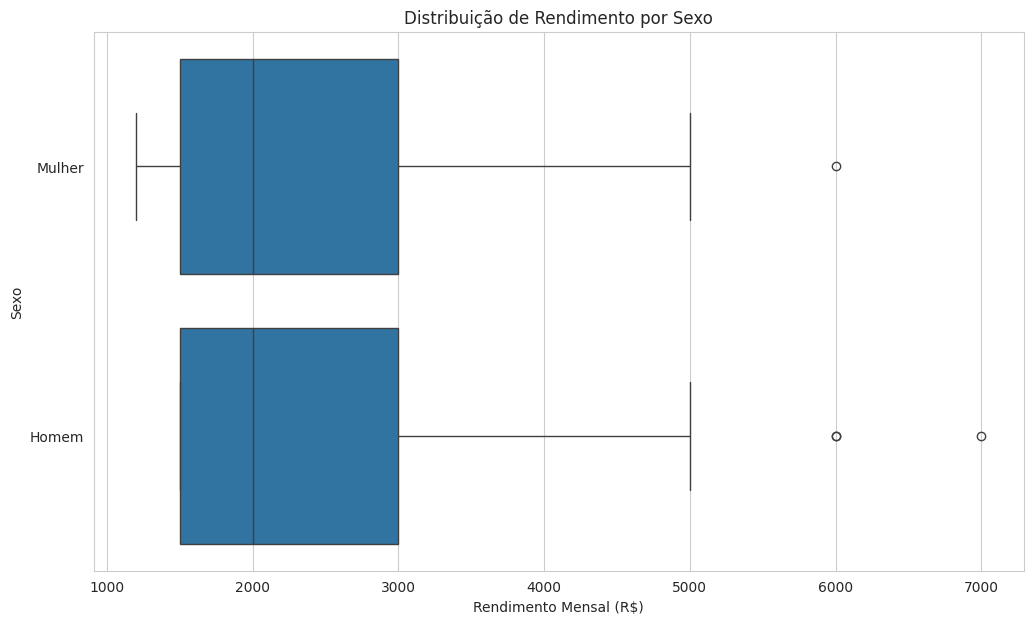

In [27]:
# Célula 3.2.1: 'Rendimento' vs 'Sexo'
sns.boxplot(data=df.query("Rendimento < 8000"), x='Rendimento', y='Sexo')
plt.title('Distribuição de Rendimento por Sexo')
plt.xlabel('Rendimento Mensal (R$)')
plt.ylabel('Sexo')
plt.show()

**Análise:** O boxplot mostra que a mediana de rendimento dos homens é visivelmente maior que a das mulheres nesta amostra, um dado importante para discussões sobre desigualdade de gênero no mercado de trabalho.

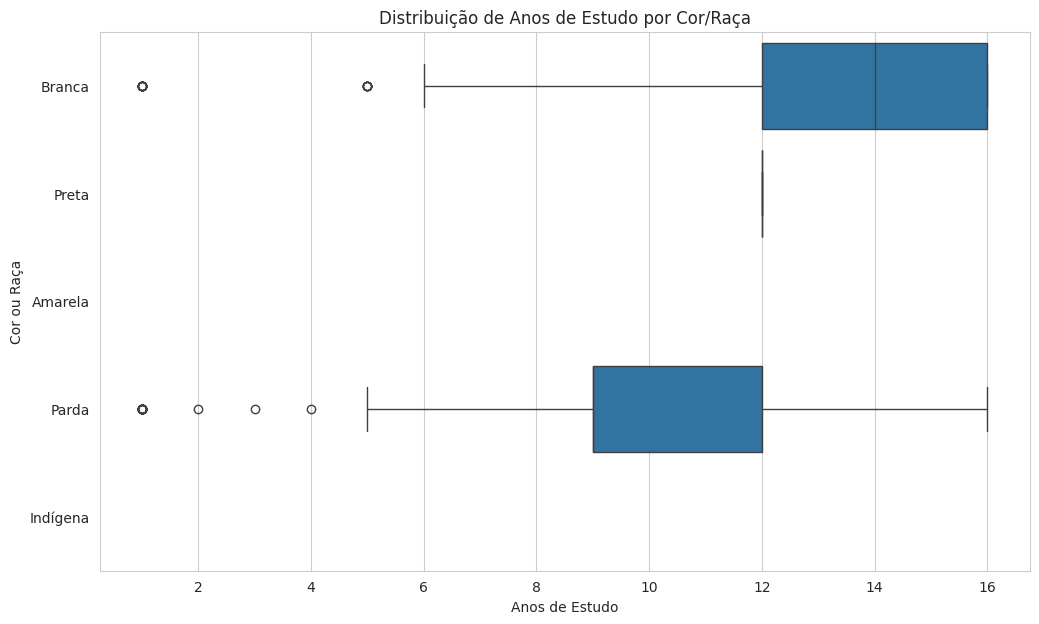

In [ ]:
# Célula 3.2.2: 'Anos de Estudo' vs 'Cor_Raca'
sns.boxplot(data=df, x='Anos_Estudo', y='Cor_Raca',
            order=['Branca', 'Preta', 'Amarela', 'Parda', 'Indígena'])
plt.title('Distribuição de Anos de Estudo por Cor/Raça')
plt.xlabel('Anos de Estudo')
plt.ylabel('Cor ou Raça')
plt.show()

**Análise:** Este gráfico permite comparar os níveis de escolaridade entre diferentes grupos. Podemos analisar as diferenças nas medianas e na dispersão dos anos de estudo para cada categoria, levantando hipóteses sobre desigualdades educacionais.

---
## 4. Introdução à Análise Multivariada

A análise multivariada eleva nossa investigação a um novo patamar, permitindo analisar **três ou mais variáveis simultaneamente**. O objetivo é entender como a relação entre duas variáveis pode ser influenciada por uma terceira, revelando insights muito mais profundos.

### 4.1 Gráfico de Dispersão com 3 Variáveis (usando `hue`)
**Conceito:** Podemos aprofundar a análise do scatterplot adicionando uma terceira variável categórica representada por cores.

**Pergunta:** A relação entre Anos de Estudo e Rendimento é a mesma para homens e mulheres?

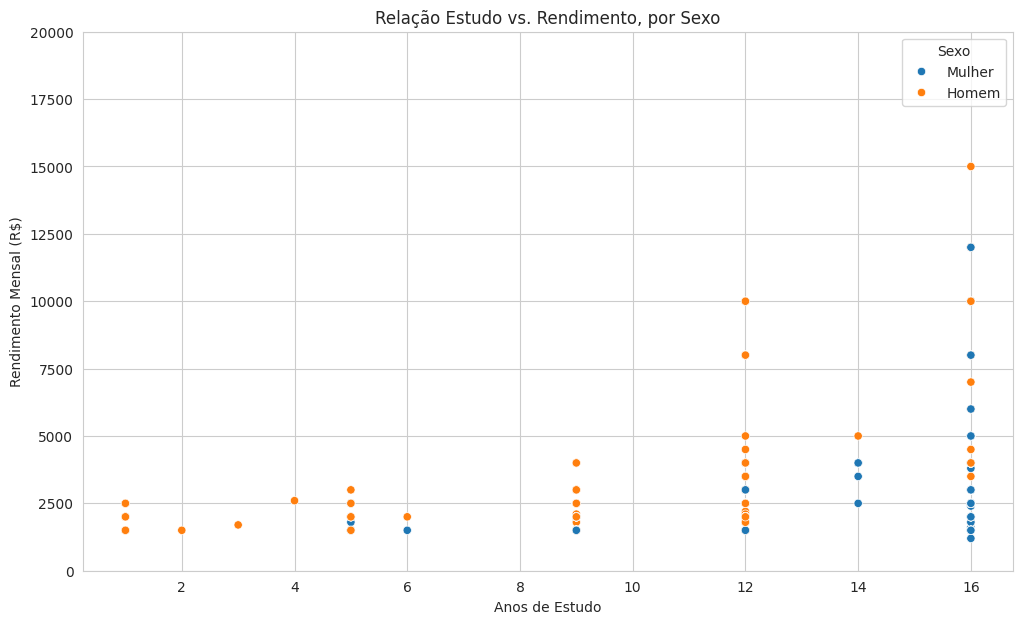

In [ ]:
# Célula 4.1.1: 'Anos de Estudo' vs 'Rendimento', colorido por 'Sexo'
amostra_pnad = df

sns.scatterplot(data=amostra_pnad, x='Anos_Estudo', y='Rendimento', alpha=1, hue='Sexo') #hue adiciona mais um parametro ao plot (variavel categorica)
plt.title('Relação Estudo vs. Rendimento, por Sexo')
plt.xlabel('Anos de Estudo')
plt.ylabel('Rendimento Mensal (R$)')
plt.ylim(0, 20000)
plt.legend(title='Sexo')
plt.show()

**Análise:** Ao colorir os pontos por sexo, podemos observar as tendências de cada grupo. Embora a tendência geral positiva se mantenha para ambos, parece que para um mesmo número de anos de estudo, os pontos representando os homens (azul) frequentemente se posicionam em faixas de rendimento mais altas que os pontos das mulheres (laranja).

### 4.2 Mapa de Calor (Heatmap) de Correlação
**Conceito:** Ferramenta que resume a correlação linear entre **todas as variáveis numéricas** do dataset em uma única matriz colorida.

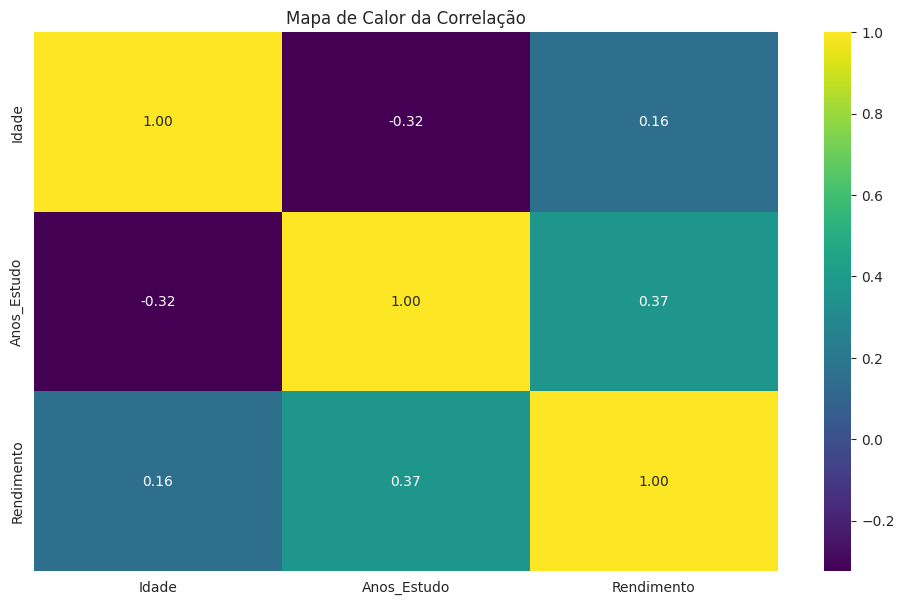

In [ ]:
# Célula 4.2.1: Gerando o Mapa de Calor
corr_matrix = df[['Idade', 'Anos_Estudo', 'Rendimento']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Mapa de Calor da Correlação')
plt.show()
#por ser uma base pequena, idade e tempo de estudo se correlacionaram negativamente, o que fez com que não fizesse sentido a correlação deles.

**Análise:** O heatmap quantifica a força das relações. A correlação mais forte (0.37) é entre `Anos_Estudo` e `Rendimento`. As outras relações são positivas, porém mais fracas.

### 4.3 A Ferramenta Definitiva: Pairplot
**Conceito:** O `pairplot` (gráfico de pares) cria uma matriz que mostra:
* **Gráficos de Dispersão** para cada par de variáveis.
* **Histogramas** na diagonal para cada variável individual.

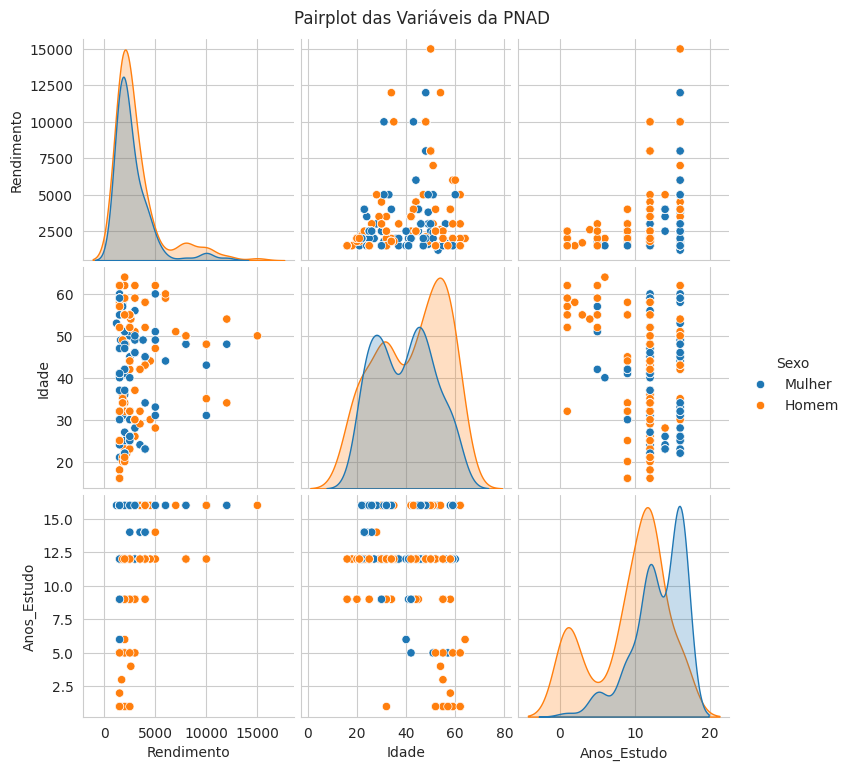

In [29]:
# Célula 4.3.1: Gerando o Pairplot
# ATENÇÃO: O pairplot é computacionalmente intenso. Usamos uma amostra BEM PEQUENA (500 pontos).
amostra_pairplot = df

sns.pairplot(data=amostra_pairplot[['Rendimento', 'Idade', 'Anos_Estudo', 'Sexo']], hue='Sexo')
plt.suptitle('Pairplot das Variáveis da PNAD', y=1.02)
plt.show()

**Como Ler o Pairplot e Análise:**
* **Diagonal:** Vemos os histogramas de `Rendimento`, `Idade` e `Anos_Estudo`, separados por sexo. Vemos, por exemplo, que a distribuição de rendimento para homens (azul) é mais espalhada para a direita que a das mulheres (laranja).
* **Fora da Diagonal:** Vemos os gráficos de dispersão. O gráfico na linha 1, coluna 2, por exemplo, mostra `Rendimento` vs `Idade`.

O `pairplot` nos dá uma visão geral completa das distribuições e relações em um único comando, sendo uma ferramenta indispensável para o início de qualquer projeto de análise de dados.